# Early Stopping

## Prerequisites 
To start with early stopping criteria in Decision Tree, you must have an understanding of:
- Decision Tree: Unit 1- Overfitting in the decision tree



## Learning Objective
- Discuss how early stopping technique works.

- List out different early stopping criteria.
- Implement early stopping criteria in Sklearn to find an optimal tree.



## Introduction
In the previous notebook, we introduced two techniques, early stopping and pruning, to prevent overfitting in the decision tree. In this notebook, we will discuss the first technique: early stopping. In early stopping, we set certain early stopping criteria before we grow a decision tree. 

A decision tree is built by recursively splitting the data samples at each node until all the nodes are pure. As discussed before, this can result in a very deep tree. However, we can specify certain early stopping criteria before we build a tree. Once we specify these early stopping criteria, we need to check these criteria while splitting the data samples at each node. If any of the early stopping criteria is met, we stop splitting the data samples at that particular node, thus effectively controlling the tree's depth.

There are various early stopping criteria. In this chapter, we will discuss the following early stopping criteria:

__1. Depth limitation__

__2. Impurity threshold__

__3. Minimum samples in a node__



> **Note:**
>
> In this notebook, we will use the same dataset used in the previous notebook. We will use the function `plot_tree()`, which we have already defined in the previous notebook to plot the tree structure.

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from plot_tree import plot_tree 


X, y = make_classification(n_samples = 100, n_features = 2, n_informative = 2,
                            n_redundant = 0, n_classes = 3, random_state = 10, 
                           flip_y = 0.02, class_sep = 1, n_clusters_per_class = 1)


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 32)

Let's train a decision tree by setting parameters to the default value. This will create a decision tree with pure leaves. Also, let's plot the tree structure.

Tree Structure 1


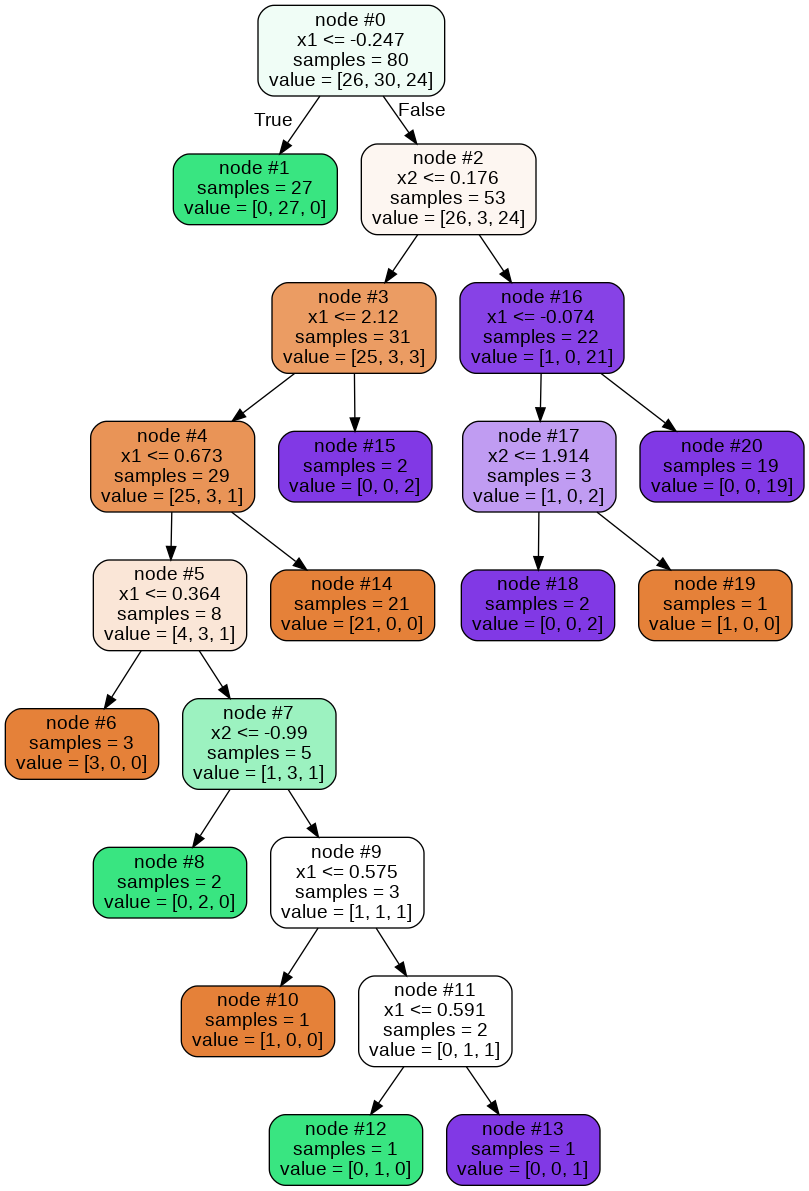

In [ ]:
from sklearn.tree import DecisionTreeClassifier


# Train a decision tree with default parameters
clf1 = DecisionTreeClassifier(random_state = 12)   # Every time we will set random_state to 12
clf1.fit(X_train, y_train)  

# Plot the tree structure
print("Tree Structure 1")  
plot_tree(clf1)

We will refer the above tree to compare the changes made in tree structure by different early stopping criteria.

### 1. Depth limitation

 In the previous chapter on overfitting, we showed accuracy of decision tree at different depths. The above tree (grown to its entirety) had a training accuracy of 100% and a test accuracy of 75%. The above tree had overfitted the training data.
 
One way to reduce overfitting is to __limit the depth of the tree__. For example, in the above plotted tree, we can limit the tree's depth to 3 to remove the left elongated sub-tree. The decision tree, in the default setting, iteratively splits the nodes until all leaves are pure. With __max_depth__ set to 3, it checks if the maximum depth limitation is reached before creating a split. If the maximum depth is reached, the further split is stopped.

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.externals.six import StringIO
from IPython.display import Image, display
from sklearn.tree import export_graphviz
import pydotplus


def plot_tree(tree_clf, impurity = False):
    """
    A function to plot the structure of tree
    
    Parameters:
    -----------
    tree_clf: Object
              A trained decision tree
    impurity: Bool, default to false
              Whether to show impurity in the node of tree.
              
    Returns: None          
    """
    dot_data = StringIO()
    label = ['class 0','class 1', 'class 2']
    export_graphviz(tree_clf,feature_names = ['x1', 'x2'], impurity = impurity,
                    out_file=dot_data,  filled=True, rounded=True, node_ids = True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    display(Image(graph.create_png()))
    

Tree structure 2


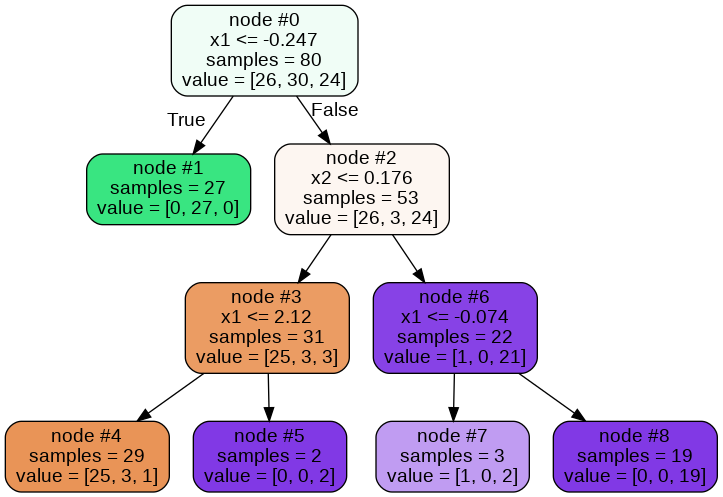

Training Accuracy: 0.9375
Test Accuracy 0.85


In [ ]:
from sklearn.metrics import accuracy_score

clf2 = DecisionTreeClassifier(max_depth = 3, random_state = 12)
clf2.fit(X_train, y_train)  

# Plot the tree structure
print("Tree Structure 2")  
plot_tree(clf2)


print("Training Accuracy:", accuracy_score(y_train, clf2.predict(X_train)))
print("Test Accuracy",accuracy_score(y_test, clf2.predict(X_test)))

Setting __max_depth__ to 3 gives the test accuracy of 85%, which is better than 75% accuracy for a fully grown tree. However, it is not a good practice to arbitrarily set the depth. When the depth is set too low, the tree may underfit the training data. So to obtain an optimal depth, we should use a separate validation dataset. As seen in the above plot, the node #4 doesn't grow any further due to depth limitation. 

### 2. Impurity threshold

 In the decision tree, we try to reduce each node's impurity by optimizing the impurity metrics (i.e., select the split that better reduces the impurity). The default impurity metric used in sklearn is the [Gini index](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). The impurity reduces while we go down the tree, and this reduction in impurity signifies that nodes are getting purer and purer with each split. In the decision tree, the reduction in impurity, initially, is generally high. This means the first few split creates more pure nodes than the latter one. So we can impose __impurity reduction constraints__ in the decision tree to avoid splitting of nodes, which does not produce significantly more pure node.

 The mathematical formula for the reduction in impurity after the split of a node $t$ is given as:

$$
R = \text{impurity} - \left( \frac{N_{tR}}{N_t} \cdot \text{right\_impurity} \right) - \left( \frac{N_{tL}}{N_t} \cdot \text{left\_impurity} \right)
$$

Where,

- $N$ is the total number of samples

- $N_t$ is the number of samples in the current node

- $N_{tL}$ is the number of samples in the left child of the current node

- $N_{tR}$ is the number of samples in the right child of the current node

- $\text{impurity}$ is the impurity in the current node

- $\text{right\_impurity}$ is the impurity of the right child node of the  current node

- $\text{left\_impurity}$ is the impurity of the left child node of the  current node

<br>

We want to reduce the impurity in the decision tree, but how much impurity reduction is acceptable? Each split adds the complexity(the number of nodes gets increased by two), but with that added complexity, how much impurity reduction is fine. Are we fine with just an insignificant reduction in impurity? Of course not, we want some significant reduction in impurity with added complexity. To apply impurity reduction criteria, the decision tree in sklearn provides a parameter called __min_impurity_decrease__, which allows us to specify how much impurity reduction we want to create each split.

Let's see how the decision tree structure changes when we set min_impurity_decrease to some value, say 0.1.


__Note:__ We should use a validation set to compute the optimal value of min_impurity_decrease.

Tree Structure 3


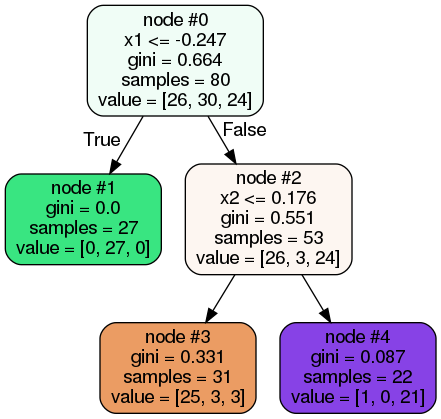

In [ ]:
clf3 = DecisionTreeClassifier(min_impurity_decrease = 0.1, random_state = 12)
clf3.fit(X_train, y_train)

print("Tree Structure 3")  
plot_tree(clf3, impurity= True)

With minimum impurity reduction set to 0.1, we have obtained the above tree. The splits at node #0 and node #2 result in impurity reduction greater than 0.1. In the remaining impure node(node #3 and node #4), the impurity reduction is less than 0.1, so split was not created.


 


### 3. Minimum samples in node

 Another way to prevent overfitting in the decision tree is to set __the minimum number of samples required in a node__ to create a split. In tree structure 1, node #5 and node #17 contain only 8 and 3 samples. These small samples can either be legitimate samples or outliers (extreme cases) or noise (from wrong labeling). Thus, trying to partition them perfectly will result in unnecessary splits. We can set a minimum number of samples and stop further split if the number of samples is less than some specified value.

To apply minimum number of samples in a node, the decision tree in sklearn provides a parameter called __min_sample_split__, which allows us to specify minimum number of samples required to create a split.

 Let us see the decision tree's structure after limiting the minimum number of samples in a node to some arbitrary value, say 10.




Tree Structure 4


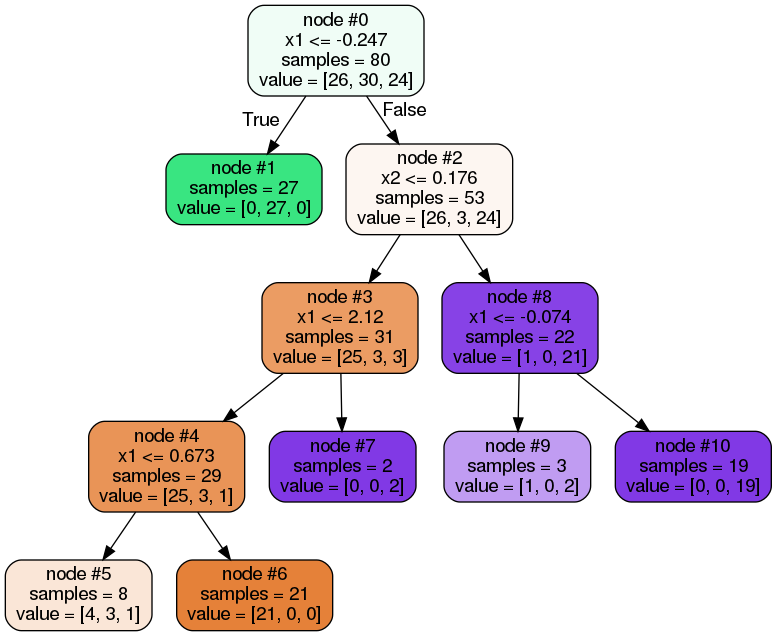

In [ ]:
clf4 = DecisionTreeClassifier(min_samples_split=10, random_state = 12)
clf4.fit(X_train, y_train)

print("Tree Structure 4")  
plot_tree(clf4)

The above plot shows the effect of setting a minimum number of samples. If we notice carefully, the split of impure nodes(node #5 and node #9) with sample numbers less than ten is stopped. Also notice, setting a minimum number of samples has no direct effect on depth.We care only if the minimum number of samples in a node is less or equal to some pre-specified value. 


__Note:__ The choice of the minimum number of samples, ten here, is arbitrary. We should use a validation set and perform cross-validation to obtain the optimal value for the minimum number of samples. 

In this way, we used different early stopping techniques like depth limitation, impurity threshold, and minimum samples in a node to avoid overfitting. We set these values early before training a tree without knowing how they will impact the tree's performance.  Early stopping techniques are easy to set up, but we may also underfit the tree while trying hard to avoid overfitting. One of the solutions to this problem is cross-validation. But we will focus on another technique called pruning, which will remove insignificant nodes while simultaneously monitoring the impact of this action(removal of a node) on the tree's performance.


## Key Takeaways

- Early stopping criteria are applied while growing a tree.


- Depth limitation limits the growth of a tree up to the specified depth.

- Impurity threshold stops further split if impurity reduction is less than some prespecified value.

- Minimum samples in a node stops further split if the number of samples in an impure node is less than some specified value.

## Additional Resources

* Tips on pratical use

 * scikit-learn developers, [Decision Trees](https://scikit-learn.org/stable/modules/tree.html)
   * Check section 1.10.5 : Tips on pratical use section
